***Grafiti Image Transformation***

Images can be found at : https://www.robots.ox.ac.uk/~vgg/data/affine/

In [2]:
import cv2 as cv 
import numpy as np
import matplotlib.pyplot as plt

***Image Warping Using given Homography Matrix***

In [20]:
im1 = cv.imread('./Grafiti/img5.ppm', cv.IMREAD_ANYCOLOR)
im5 = cv.imread('./Grafiti/img1.ppm', cv.IMREAD_ANYCOLOR)
   
with open('./Grafiti/H1to5p') as f:
    H = [[float(x) for x in line.split()] for line in f]       
print(H)
H = np.array(H)

im5_warped = cv.warpPerspective(im5, H, (1000,1000))
im5_warped[0:im1.shape[0], 0:im1.shape[1]] = im1

cv.namedWindow("Image 1", cv.WINDOW_AUTOSIZE)
cv.imshow("Image 1", im1)
cv.waitKey(0)
cv.namedWindow("Image 5", cv.WINDOW_AUTOSIZE)
cv.imshow("Image 5", im5)
cv.waitKey(0)
cv.namedWindow("Image 5 Warped", cv.WINDOW_AUTOSIZE)
cv.imshow("Image 5 Warped", im5_warped)
cv.waitKey(0)
cv.destroyAllWindows()

[[0.62544644, 0.057759174, 222.01217], [0.22240536, 1.1652147, -25.605611], [0.00049212545, -3.6542424e-05, 1.0]]


***Computing the Homogrpahy Using Mouse-Clicked Points
and Warping***

In [3]:
N = 5
global n 
n = 0    
p1 = np.empty((N,2))
p2 = np.empty((N,2))

# mouse callback function
def draw_circle(event,x,y,flags,param):
    global n
    p = param[0]
    if event == cv.EVENT_LBUTTONDOWN:
        cv.circle(param[1],(x,y),5,(255,0,0),-1)        
        p[n] = (x,y)
        n += 1
          

im1 = cv.imread('./Grafiti/img1.ppm', cv.IMREAD_ANYCOLOR)
im4 = cv.imread('./Grafiti/img4.ppm', cv.IMREAD_ANYCOLOR)

im1copy = im1.copy()
im4copy = im4.copy()
   

cv.namedWindow('Image 1', cv.WINDOW_AUTOSIZE)

param = [p1, im1copy]
cv.setMouseCallback('Image 1',draw_circle, param)

while(1):
    cv.imshow("Image 1", im1copy)
    if n == N:
        break
    if cv.waitKey(20) & 0xFF == 27:
        break


param = [p2, im4copy]
n = 0
cv.namedWindow("Image 4", cv.WINDOW_AUTOSIZE)
cv.setMouseCallback('Image 4',draw_circle, param)

while(1):
    cv.imshow("Image 4", im4copy)
    if n == N:
        break
    if cv.waitKey(20) & 0xFF == 27:
        break


#print(p1)
#print(p2)

H, mask = cv.findHomography(p1,p2)
print ('Homography Matrix Calculated: \n', H)

im4_warped = cv.warpPerspective(im4, np.linalg.inv(H), (1000,1000))
im4_warped[0:im1.shape[0], 0:im1.shape[1]] = im1

cv.namedWindow("Image 4 Warped", cv.WINDOW_AUTOSIZE)
cv.imshow("Image 4 Warped", im4_warped)
cv.waitKey(0)

with open('./Grafiti/H1to4p') as f:
    H_given = [[float(x) for x in line.split()] for line in f]       
#print('Homography Matrix given: \n', H_given)

im4_warped_given = cv.warpPerspective(im5, np.linalg.inv(H_given), (1000,1000))
im4_warped_given[0:im1.shape[0], 0:im1.shape[1]] = im1

cv.namedWindow("Image 4 Warped by given homography matrix", cv.WINDOW_AUTOSIZE)
cv.imshow("Image 4 Warped by given homography matrix", im4_warped_given)
cv.waitKey(0)

cv.destroyAllWindows()

Homography Matrix Calculated: 
 [[ 6.74453782e-01  6.77958414e-01 -3.14116080e+01]
 [-1.43070920e-01  9.71701434e-01  1.51643074e+02]
 [ 4.40355091e-04 -7.67099469e-06  1.00000000e+00]]


In [4]:
def get_homography(p1, p2):
    '''
    p1 : list of Source points
    p2 : list of destination points
    return : homography matrix between p1 and p2
    '''
    A = np.empty((2*N, 9))
    for i in range(len(p1)):
        A[2*i,:] = np.array([0,0,0,p2[i,0],p2[i,1],1,-1*p1[i,1]*p2[i,0],-1*p1[i,1]*p2[i,1],-1*p1[i,1]])
        A[2*i+1,:] = np.array([p2[i,0],p2[i,1],1,0,0,0,-1*p1[i,0]*p2[i,0],-1*p1[i,0]*p2[i,1],-1*p1[i,0]])

    M = np.matmul(A.T,A)
    _,w,v = np.linalg.svd(M) #conducting singular value decomposition to get eigenvectors and eigen values
    h = v[np.argmin(w),:] #Obtaining Eigenvector corresponding to the smallest eigenvalue
    H = h.reshape(3,3)
    H = np.linalg.inv(H)
    H = H/H[-1,-1] #Making h33 = 1
    
    return H #H being the homography matrix corresponding to smallest eigen value

In [7]:
N = 5
global n 
n = 0    
p1 = np.empty((N,2))
p2 = np.empty((N,2))

# mouse callback function
def draw_circle(event,x,y,flags,param):
    global n
    p = param[0]
    if event == cv.EVENT_LBUTTONDOWN:
        cv.circle(param[1],(x,y),5,(255,0,0),-1)        
        p[n] = (x,y)
        n += 1
          

im1 = cv.imread('./Grafiti/img1.ppm', cv.IMREAD_ANYCOLOR)
im4 = cv.imread('./Grafiti/img4.ppm', cv.IMREAD_ANYCOLOR)

im1copy = im1.copy()
im4copy = im4.copy()
   

cv.namedWindow('Image 1', cv.WINDOW_AUTOSIZE)

param = [p1, im1copy]
cv.setMouseCallback('Image 1',draw_circle, param)

while(1):
    cv.imshow("Image 1", im1copy)
    if n == N:
        break
    if cv.waitKey(20) & 0xFF == 27:
        break


param = [p2, im4copy]
n = 0
cv.namedWindow("Image 4", cv.WINDOW_AUTOSIZE)
cv.setMouseCallback('Image 4',draw_circle, param)

while(1):
    cv.imshow("Image 4", im4copy)
    if n == N:
        break
    if cv.waitKey(20) & 0xFF == 27:
        break


print(p1)
print(p2)

cv.destroyAllWindows()

h = get_homography(p2,p1) 

im4_warped = cv.warpPerspective(im4, h, (1000,1000))
im4_warped[0:im1.shape[0], 0:im1.shape[1]] = im1

cv.namedWindow("Image 4 Warped", cv.WINDOW_AUTOSIZE)
cv.imshow("Image 4 Warped", im4_warped)
cv.waitKey(0)

cv.destroyAllWindows()

[[134. 134.]
 [145. 521.]
 [747. 449.]
 [688. 112.]
 [423. 370.]]
[[138. 247.]
 [397. 602.]
 [586. 363.]
 [389. 125.]
 [426. 383.]]


***SuperGlue***

In [12]:
with np.load('img1_img4_matches (2).npz') as data:
    k1 = list(data['keypoints0'])
    k2 = list(data['keypoints1'])
    m = list(data['matches'])
    
p1 = []
p2 = []

for i in range(len(k1)):
    if m[i]!= -1:
        p1.append(k1[i])
        p2.append(k2[m[i]])

p1x= np.array(p1)
p2x= np.array(p2)



In [13]:
len(p1x),len(p2x)

(114, 114)

In [37]:
im1 = cv.imread('img1.jpg', cv.IMREAD_ANYCOLOR)
im4 = cv.imread('img4.jpg', cv.IMREAD_ANYCOLOR)

H, mask = cv.findHomography(p1x,p2x, cv.RANSAC)
print ('Homography Matrix Calculated: \n', H)

im = cv.warpPerspective(im4, H, (im4.shape[1]*2,im4.shape[0]))
#to remove the blank regions in the stiched image   
right_bound=im4.shape[1]*2
for i in range(right_bound-1,0,-1):
    count=0;
    for j in range(0,im4.shape[0]):
        if(sum(im[j,i])==0):
            count+=1;
    if(count<50):
        right_bound=i
        break
    
im[0:im1.shape[0], 0:im1.shape[1]] = im1

cv.namedWindow("Image 4 Warped", cv.WINDOW_AUTOSIZE)
cv.imshow("Image 4 Warped", im[:,0:right_bound])
cv.waitKey(0)
cv.destroyAllWindows()

Homography Matrix Calculated: 
 [[ 6.95583275e-01  7.49863105e-01 -3.16968671e+01]
 [-1.27732749e-01  1.00069607e+00  1.09005168e+02]
 [ 5.98052663e-04  1.53678786e-05  1.00000000e+00]]


In [36]:
im1.shape

(640, 800, 3)

***. Stitch more than two images using mouse-clicked points***

In [24]:
import numpy as np
import cv2 as cv

N = 5
global n 
n = 0    
p1 = np.empty((N,2))
p2 = np.empty((N,2))
p3 = np.empty((N,2))

# mouse callback function
def draw_circle(event,x,y,flags,param):
    global n
    p = param[0]
    if event == cv.EVENT_LBUTTONDOWN:
        cv.circle(param[1],(x,y),5,(255,0,0),-1)        
        p[n] = (x,y)
        n += 1
          

im1 = cv.imread('./Grafiti/img1.ppm', cv.IMREAD_ANYCOLOR)
im2 = cv.imread('./Grafiti/img3.ppm', cv.IMREAD_ANYCOLOR)
im3 = cv.imread('./Grafiti/img5.ppm', cv.IMREAD_ANYCOLOR)

im1copy = im1.copy()
im2copy = im2.copy()
im3copy = im3.copy()   

cv.namedWindow('Image 1', cv.WINDOW_AUTOSIZE)

param = [p1, im1copy]
cv.setMouseCallback('Image 1',draw_circle, param)

while(1):
    cv.imshow("Image 1", im1copy)
    if n == N:
        break
    if cv.waitKey(20) & 0xFF == 27:
        break

param = [p2, im2copy]
n = 0
cv.namedWindow("Image 2", cv.WINDOW_AUTOSIZE)
cv.setMouseCallback('Image 2',draw_circle, param)

while(1):
    cv.imshow("Image 2", im2copy)
    if n == N:
        break
    if cv.waitKey(20) & 0xFF == 27:
        break

param = [p3, im3copy]
n = 0
cv.namedWindow("Image 3", cv.WINDOW_AUTOSIZE)
cv.setMouseCallback('Image 3',draw_circle, param)

while(1):
    cv.imshow("Image 3", im3copy)
    if n == N:
        break
    if cv.waitKey(20) & 0xFF == 27:
        break

H1_3, mask1 = cv.findHomography(p1,p2)
H1_5, mask2 = cv.findHomography(p1,p3)

im2_warped = cv.warpPerspective(im2, np.linalg.inv(H1_3), (1000,1000))
im2_warped[0:im1.shape[0], 0:im1.shape[1]] = im1
im3_warped = cv.warpPerspective(im3,np.linalg.inv(H1_5),(1000,1000))
im2_warped[0:im3_warped.shape[0],0:800] = im3_warped[:,0:800]

cv.namedWindow("Image 2 Warped", cv.WINDOW_AUTOSIZE)
cv.imshow("Image 2 Warped", im2_warped)
cv.waitKey(0)

cv.namedWindow("Image 3 Warped", cv.WINDOW_AUTOSIZE)
cv.imshow("Image 3 Warped", im3_warped)
cv.waitKey(0)

cv.namedWindow("Final Image", cv.WINDOW_AUTOSIZE)
cv.imshow("Final Image", im2_warped)
cv.waitKey(0)
cv.destroyAllWindows()

In [8]:
img = cv.imread('Image 5 Warped.jpg', cv.IMREAD_ANYCOLOR)
#im =cv.GaussianBlur(img,(7,7),3)
im = cv.medianBlur(img,5)
cv.namedWindow("Final Image", cv.WINDOW_AUTOSIZE)
cv.imshow("Final Image", im)
cv.waitKey(0)
cv.destroyAllWindows()

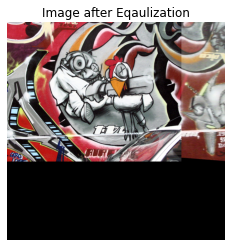

In [6]:
img = cv.imread('Image 5 Warped.jpg', cv.IMREAD_ANYCOLOR)
img_to_yuv = cv.cvtColor(img,cv.COLOR_BGR2YUV)
#Histogram Calculation
img_to_yuv[:,:,0] = cv.equalizeHist(img_to_yuv[:,:,0])
hist_equalization_result = cv.cvtColor(img_to_yuv, cv.COLOR_YUV2RGB)
#Displaying the Image
plt.imshow(hist_equalization_result)
plt.title('Image after Eqaulization')
plt.axis('off')
plt.show()